# Adult dataset

## Load and first look at the dataset
Consider the adult dataset available at https://archive.ics.uci.edu/ml/datasets/Adult, also on the `data` folder. The dataset was extracted by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)) [AGI - Adjusted Gross Income]

### Load the dataset and show the first 10 samples.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_bokeh
pandas_bokeh.output_notebook()


df = pd.read_csv('data/adult/adult.csv')
df.head(10)

Loading BokehJS ...

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### How many samples has the dataset?

In [2]:
print(f'The dataset has {df.shape[0]} samples')

The dataset has 48842 samples


### Check the dataset's columns
Check that the dataset has 15 columns:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. Represents the sampling weight assigned to each observation in the dataset. It is used to adjust for the fact that some observations in the dataset may represent a larger portion of the population than others.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous. Represents the number of years of education that a person has completed.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Represents the capital gains for a person, from investment sources other than wage/salary.
- capital-loss: continuous. Represents the capital losses for a person,  from investment sources other than wage/salary.
- hours-per-week: continuous. Represents the hours per week that a person works.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K. Represents whether a person makes more or less than 50K a year.


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Add a column with the weight of each sample. Show the samples with the highest weight.
The weight is the fnlwgt divided by the sum of all fnlwgt.
Unless asked otherwise, all the following exercises should be done __without__ using the weighted data.

In [4]:
df['weight'] = df['fnlwgt']/df['fnlwgt'].sum()
df.sort_values('weight', ascending=False).head(100)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,weight
7974,27,Private,1490400,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K,0.000161
30730,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,0.000160
34419,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000157
33020,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,0.000147
31850,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43071,27,Private,706026,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K,0.000076
40634,27,Private,704108,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,0.000076
22539,27,Private,704108,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K,0.000076
38242,31,Private,703107,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,0,40,United-States,<=50K,0.000076


### Separate the dataset into two datasets, one for men and one for women. How many samples are in each dataset? Which gender has more samples? Can you guess why?

In [5]:
mask_men = df['gender']=='Male'
mask_women = df['gender']=='Female'

df_men = df[mask_men]
df_women = df[mask_women]

print(f'Men population size is {df_men.shape[0]} and women population size is {df_women.shape[0]}')

Men population size is 32650 and women population size is 16192


### Get a dataframe with the men that have an income high income (>50K).

In [6]:
mask_high_income = df['income']=='>50K'
mask_low_income = df['income']=='<=50K'

df_men_high_income = df[mask_men & mask_high_income]
df_women_high_income = df[mask_women & mask_high_income]

print('Example of men with high income')
df_men_high_income.head(5)

Example of men with high income


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,weight
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000036
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0.000017
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,0.000011
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,0.000020
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K,0.000030


### What is the rate of people with high income (>50K)? And the weighted rate of people with high income?

In [7]:
rate_high_income = df[mask_high_income].shape[0]/df.shape[0]
print("The rate of people with high income is:", rate_high_income)

The rate of people with high income is: 0.23928176569346055


In [8]:
rate_high_income_weighted = df.loc[mask_high_income, 'weight'].sum()/df.weight.sum()
print("The weighted rate of people with high income is:", rate_high_income_weighted)

The weighted rate of people with high income is: 0.23777596096456424


### What is the rate of men with high income (>50K)? and of women with high income?

In [9]:
print('The rate of people with high income is:',  df[mask_high_income].shape[0]/df.shape[0])
print('The rate of men with high income is:',  df_men_high_income.shape[0]/df_men.shape[0])
print('The rate of women with high income is:', df_women_high_income.shape[0]/df_women.shape[0])

The rate of people with high income is: 0.23928176569346055
The rate of men with high income is: 0.3037672281776417
The rate of women with high income is: 0.10925148221343874


### Plot the distribution of the ages for males and females in the same histogram.

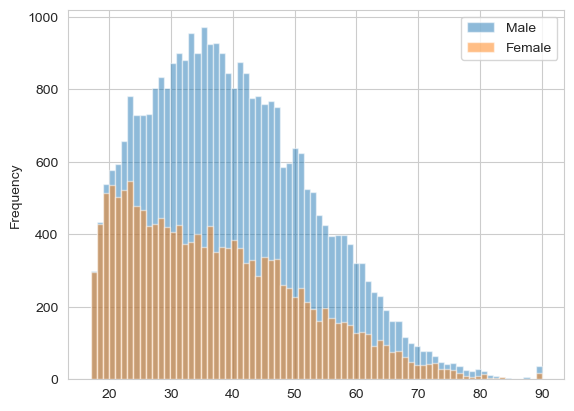

In [10]:

number_of_bins = df['age'].max() - df['age'].min() + 1

ax = df.loc[mask_men, 'age'].plot.hist(alpha=0.5, bins=number_of_bins)
df.loc[mask_women, 'age'].plot.hist(alpha=0.5, ax=ax, bins=number_of_bins)
ax.legend(['Male', 'Female'])

### Plot the distributions when combining the age and income

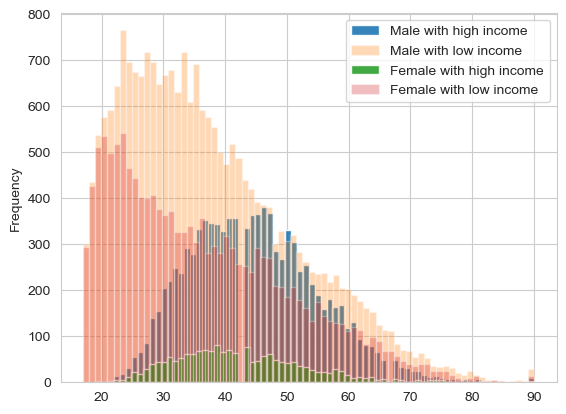

In [11]:
ax = df.loc[mask_men & mask_high_income, 'age'].plot.hist(alpha=0.9, bins=number_of_bins)
df.loc[mask_men & ~mask_high_income, 'age'].plot.hist(ax=ax, alpha=0.3, bins=number_of_bins)
df.loc[~mask_men & mask_high_income, 'age'].plot.hist(ax=ax, alpha=0.9, bins=number_of_bins)
df.loc[~mask_men & ~mask_high_income, 'age'].plot.hist(ax=ax, alpha=0.3, bins=number_of_bins)
ax.legend(['Male with high income','Male with low income','Female with high income','Female with low income', ])

## Group and pivot tables

### How many samples can you find per native-country?

In [12]:
df['native-country'].groupby(df['native-country']).count().sort_values(ascending=False)

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [13]:
df.pivot_table(index='native-country', values='income', aggfunc='count')#.sort_values(ascending=False)

,income
native-country,
?,857
Cambodia,28
Canada,182
China,122
Columbia,85
Cuba,138
Dominican-Republic,103
Ecuador,45
El-Salvador,155


### Build a pivot table with the age as index and the income as values and count aggfunc. Plot the result. What can you conclude?

In [14]:
df.pivot_table(index=['age'], values='income', aggfunc='count')

,income
age,
17,595
18,862
19,1053
20,1113
21,1096
...,...
86,1
87,3
88,6


In [15]:
df.pivot_table(index=['age'], values='income', aggfunc='count').plot_bokeh()


Figure(id='1003', ...)

### What the average working hours per week for the low and high income groups?

In [16]:
df.pivot_table(index=['income'], values='hours-per-week', aggfunc='mean')

,hours-per-week
income,
<=50K,38.840048
>50K,45.452896


### What is the average working hours per week depending on the native-country?

In [17]:
df.pivot_table(index=['native-country'], values='hours-per-week', aggfunc='mean').sort_values('hours-per-week', ascending=False)

,hours-per-week
native-country,
Greece,46.897959
Thailand,44.700000
Iran,42.949153
South,42.852174
France,42.789474
Ireland,42.432432
Japan,42.282609
Portugal,42.238806
Cambodia,42.035714


### What is the average working hours per week depending on the marital-status?

In [18]:
df.pivot_table(index=['marital-status'], values='hours-per-week', aggfunc='mean').sort_values('hours-per-week', ascending=False)

,hours-per-week
marital-status,
Married-civ-spouse,43.306984
Divorced,41.115483
Married-AF-spouse,39.810811
Married-spouse-absent,39.684713
Separated,39.667974
Never-married,36.891357
Widowed,33.438076


### What is the marital-status based in the number of educational years? and the reverse?

Answer question such as:
- What is the percentage of people with 10 years of education that are married?
- What is most common marital status for people with 7 years of education? and 16?
- what is the percentage of people with 10 years of education that are married?
- etc.

In [19]:
pt = df.pivot_table(index='educational-num',  aggfunc='count', columns='marital-status', values='age')#, margins=True)
pt

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
educational-num,,,,,,,
1,2.0,NaN,30.0,5.0,38.0,3.0,5.0
2,17.0,NaN,125.0,18.0,50.0,12.0,25.0
3,31.0,NaN,271.0,27.0,128.0,31.0,21.0
4,101.0,NaN,541.0,20.0,158.0,39.0,96.0
5,98.0,NaN,349.0,13.0,220.0,41.0,35.0
6,172.0,1.0,525.0,22.0,525.0,75.0,69.0
7,192.0,NaN,545.0,25.0,913.0,79.0,58.0
8,63.0,NaN,199.0,10.0,348.0,19.0,18.0
9,2416.0,15.0,7243.0,199.0,4671.0,607.0,633.0


<Axes: xlabel='marital-status', ylabel='educational-num'>

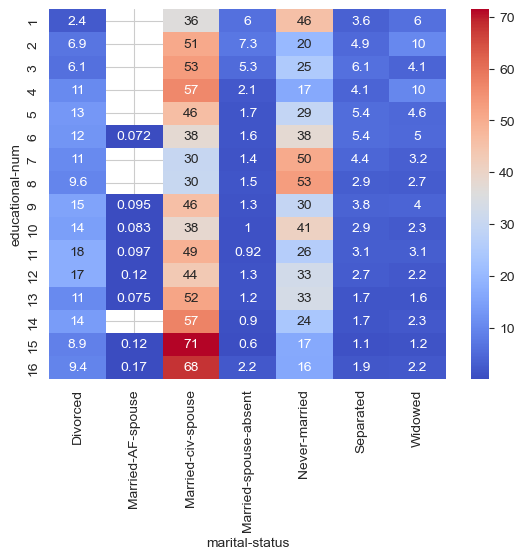

In [20]:
sns.heatmap((pt.div(pt.sum(axis=1), axis=0) * 100), annot=True, cmap='coolwarm')

<Axes: xlabel='educational-num', ylabel='marital-status'>

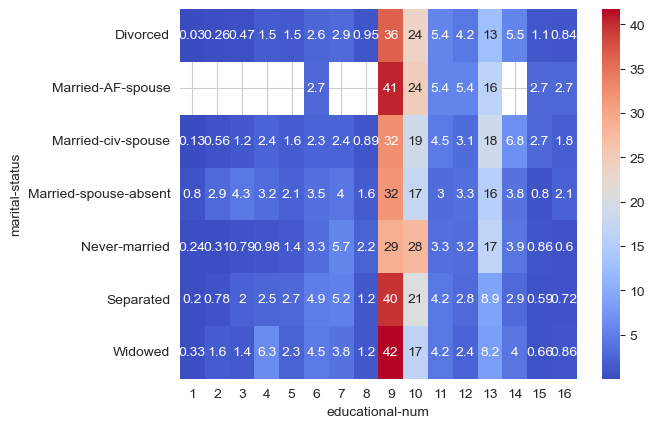

In [21]:
sns.heatmap((pt.T.div(pt.T.sum(axis=1), axis=0) * 100), annot=True, cmap='coolwarm')

<Axes: xlabel='marital-status', ylabel='educational-num'>

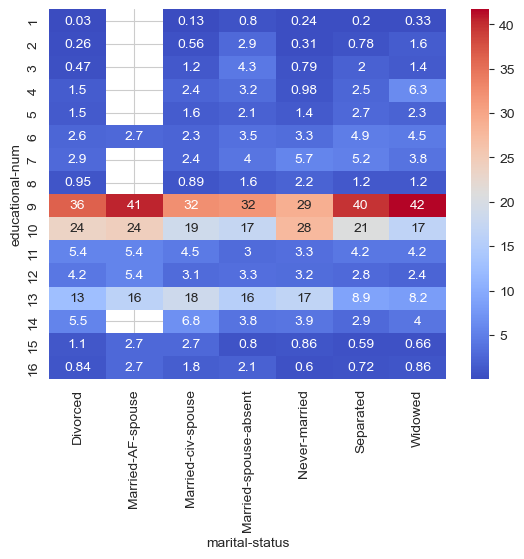

In [22]:
sns.heatmap((pt.div(pt.sum(axis=0), axis=1) * 100), annot=True, cmap='coolwarm')

### What is the more common type of income based on the marital status?

In [23]:
pt = df.pivot_table(index='marital-status',  aggfunc='count', columns='income', values='age')
pt

income,<=50K,>50K
marital-status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


In [24]:
pt.idxmax(axis=1)

marital-status
Divorced                 <=50K
Married-AF-spouse        <=50K
Married-civ-spouse       <=50K
Married-spouse-absent    <=50K
Never-married            <=50K
Separated                <=50K
Widowed                  <=50K
dtype: object

### What is the type of income based in the number of educational years?

In [25]:
pt = df.pivot_table(index=['educational-num'], values='education', columns='income', aggfunc='count', margins=True)
pt

income,<=50K,>50K,All
educational-num,,,
1,82,1,83
2,239,8,247
3,482,27,509
4,893,62,955
5,715,41,756
6,1302,87,1389
7,1720,92,1812
8,609,48,657
9,13281,2503,15784


### Based on the number of years of education and income what is the best education level to have high income?

In [26]:
pt['>50K']/pt['All']

educational-num
1      0.012048
2      0.032389
3      0.053045
4      0.064921
5      0.054233
6      0.062635
7      0.050773
8      0.073059
9      0.158578
10     0.189649
11     0.253275
12     0.257964
13     0.412835
14     0.549116
15     0.739808
16     0.725589
All    0.239282
dtype: float64

In [27]:
print('The best education level to have high income is', (pt['>50K']/pt['All']).idxmax(), 'years with a rate of', (pt['>50K']/pt['All']).max())

The best education level to have high income is 15 years with a rate of 0.7398081534772182


## Central tendency measures
### What is the mean age of the population? and the weighted mean age?

In [28]:
mean_age = df['age'].mean()
weighted_mean_age = (df['age']*df['weight']).sum()

print(f'The mean age is {mean_age} and the weighted mean age is {weighted_mean_age}')

The mean age is 38.64358543876172 and the weighted mean age is 38.058623090674125


### What is the average age of the women? of the men? and of the whole dataset?

In [29]:
print('The average age of women is', df_women['age'].mean())
print('The average age of men is', df_men['age'].mean())
print('The average age of population', df['age'].mean())

The average age of women is 36.92798913043478
The average age of men is 39.49439509954058
The average age of population 38.64358543876172


### What is the average age of men with high income? of the women? and of the whole dataset?

In [30]:
print('The average age of women with high income is', df.loc[mask_women & mask_high_income, 'age'].mean())
print('The average age of men with high income is', df.loc[mask_men & mask_high_income, 'age'].mean())
print('The average age of population with high income is', df.loc[mask_high_income, 'age'].mean())

The average age of women with high income is 42.219332956472584
The average age of men with high income is 44.64186327888687
The average age of population with high income is 44.275177547702576


### What is the median age of men with high income? and of men with low income? and of men's population?

In [31]:
print('The median age of men is', df['age'].median())
print('The median age of men with low income is', df.loc[~(mask_men & mask_high_income), 'age'].median())
print('The median age of men with high income is', df.loc[mask_men & mask_high_income, 'age'].median())


The median age of men is 37.0
The median age of men with low income is 35.0
The median age of men with high income is 44.0


### What is the mode of marital status? Plot the bar plot of the marital status to confirm the result.

In [32]:
df['marital-status'].mode()

0    Married-civ-spouse
Name: marital-status, dtype: object

In [33]:
df['marital-status'].value_counts().plot_bokeh(kind='bar',
                                               title='Marital status',
                                               xlabel='Marital status',
                                               ylabel='Count',
                                               figsize=(1000, 400)
                                               )

Figure(id='1156', ...)

## Dispersion measures
### Find the first and third quartile of the age of the population. What is the interquartile range?

In [34]:
q1, q3 = df['age'].quantile([0.25, 0.75])
iqr = q3-q1

print(f'Q1: {q1}, Q3: {q3}, IQR: {iqr}')

Q1: 28.0, Q3: 48.0, IQR: 20.0


### Being $\mu$ the mean age and $\sigma$ the standard deviation of age of the population, how many samples are in the interval $[\mu-\sigma, \mu+\sigma$]? What is the correponding percentage of the population?

In [35]:
mu, sigma= df['age'].mean(), df['age'].std()

low, high = mu-sigma, mu+sigma

count = df[(df['age']>=low) & (df['age']<=high)].shape[0]
print(f'The number of samples in the interval [{low}, {high}] is {count}, corresponding to {count/df.shape[0]*100:.1f} % of the population')

The number of samples in the interval [24.9330755043185, 52.35409537320494] is 32217, corresponding to 66.0 % of the population


### What is the features with higher standard deviation?

In [36]:
df.select_dtypes(include=np.number).std().sort_values(ascending=False)

fnlwgt             105604.025423
capital-gain         7452.019058
capital-loss          403.004552
age                    13.710510
hours-per-week         12.391444
educational-num         2.570973
weight                  0.000011
dtype: float64

### What is the work class with higher age standard deviation?

In [37]:
df.groupby('workclass')['age'].std().sort_values(ascending=False)

workclass
?                   20.228795
Without-pay         20.090154
Self-emp-not-inc    13.507114
Private             12.907635
Self-emp-inc        12.657457
Local-gov           12.458119
State-gov           12.377418
Federal-gov         11.437656
Never-worked         3.984693
Name: age, dtype: float64

### What is the ocupation with higher working hours standard deviation? What is the minimum and maximum working hours for each occupation? Plot the hours-per-week box plot for each occupation.

In [38]:
df.groupby('occupation')['hours-per-week'].std().sort_values(ascending=False)

occupation
Farming-fishing      17.384491
Priv-house-serv      16.776027
?                    15.062973
Sales                13.458168
Transport-moving     12.986350
Other-service        12.636979
Prof-specialty       12.518171
Protective-serv      11.920708
Exec-managerial      11.141152
Armed-Forces         11.063453
Handlers-cleaners    10.433937
Tech-support         10.316685
Adm-clerical          9.727204
Craft-repair          9.121650
Machine-op-inspct     7.452929
Name: hours-per-week, dtype: float64

In [39]:
df.pivot_table(index='occupation', values='hours-per-week', aggfunc=['min', 'max', 'std']).sort_values(by=('std', 'hours-per-week'), ascending=False)

,min,max,std
,hours-per-week,hours-per-week,hours-per-week
occupation,,,
Farming-fishing,1,99,17.384491
Priv-house-serv,2,99,16.776027
?,1,99,15.062973
Sales,2,99,13.458168
Transport-moving,4,99,12.986350
Other-service,1,99,12.636979
Prof-specialty,1,99,12.518171
Protective-serv,3,99,11.920708


<Axes: title={'center': 'hours-per-week'}, xlabel='[occupation]'>

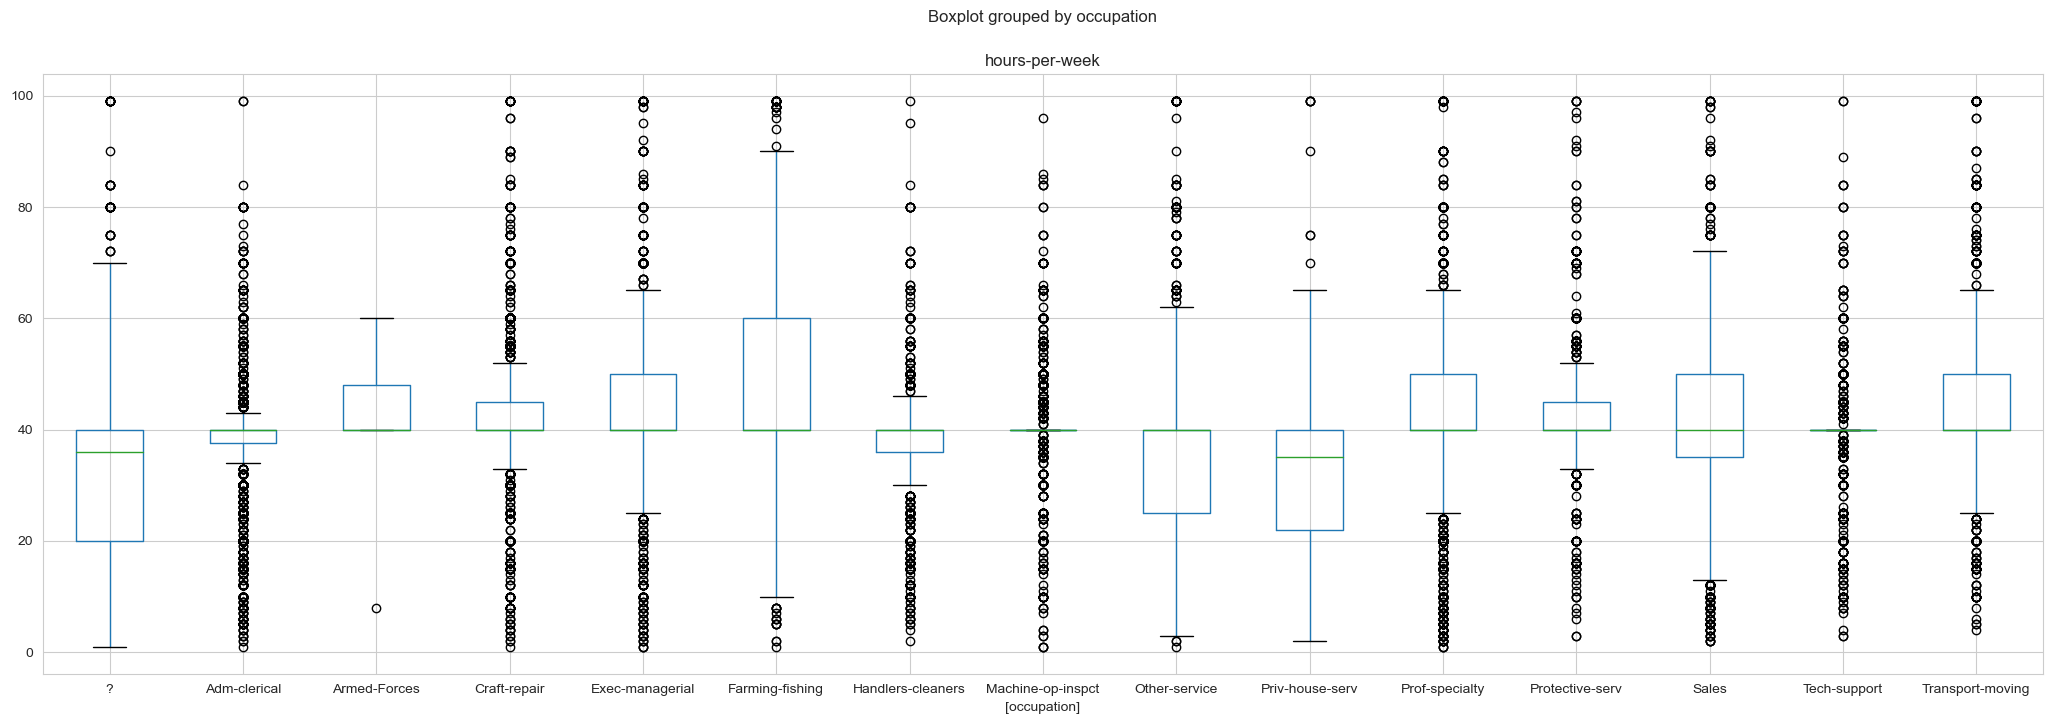

In [40]:
df[['occupation', 'hours-per-week']].boxplot(by='occupation', figsize=(25, 8))

### What is the hours-per-week standard deviation for each workclass? Plot the hours-per-week box plot for each workclass.

In [41]:
df.groupby('workclass')['hours-per-week'].std().sort_values(ascending=False)

workclass
Without-pay         16.758509
Self-emp-not-inc    16.717258
?                   15.070629
Self-emp-inc        14.242696
Never-worked        13.076272
State-gov           11.970790
Private             11.234400
Local-gov           10.825509
Federal-gov          8.927996
Name: hours-per-week, dtype: float64

<Axes: title={'center': 'hours-per-week'}, xlabel='[workclass]'>

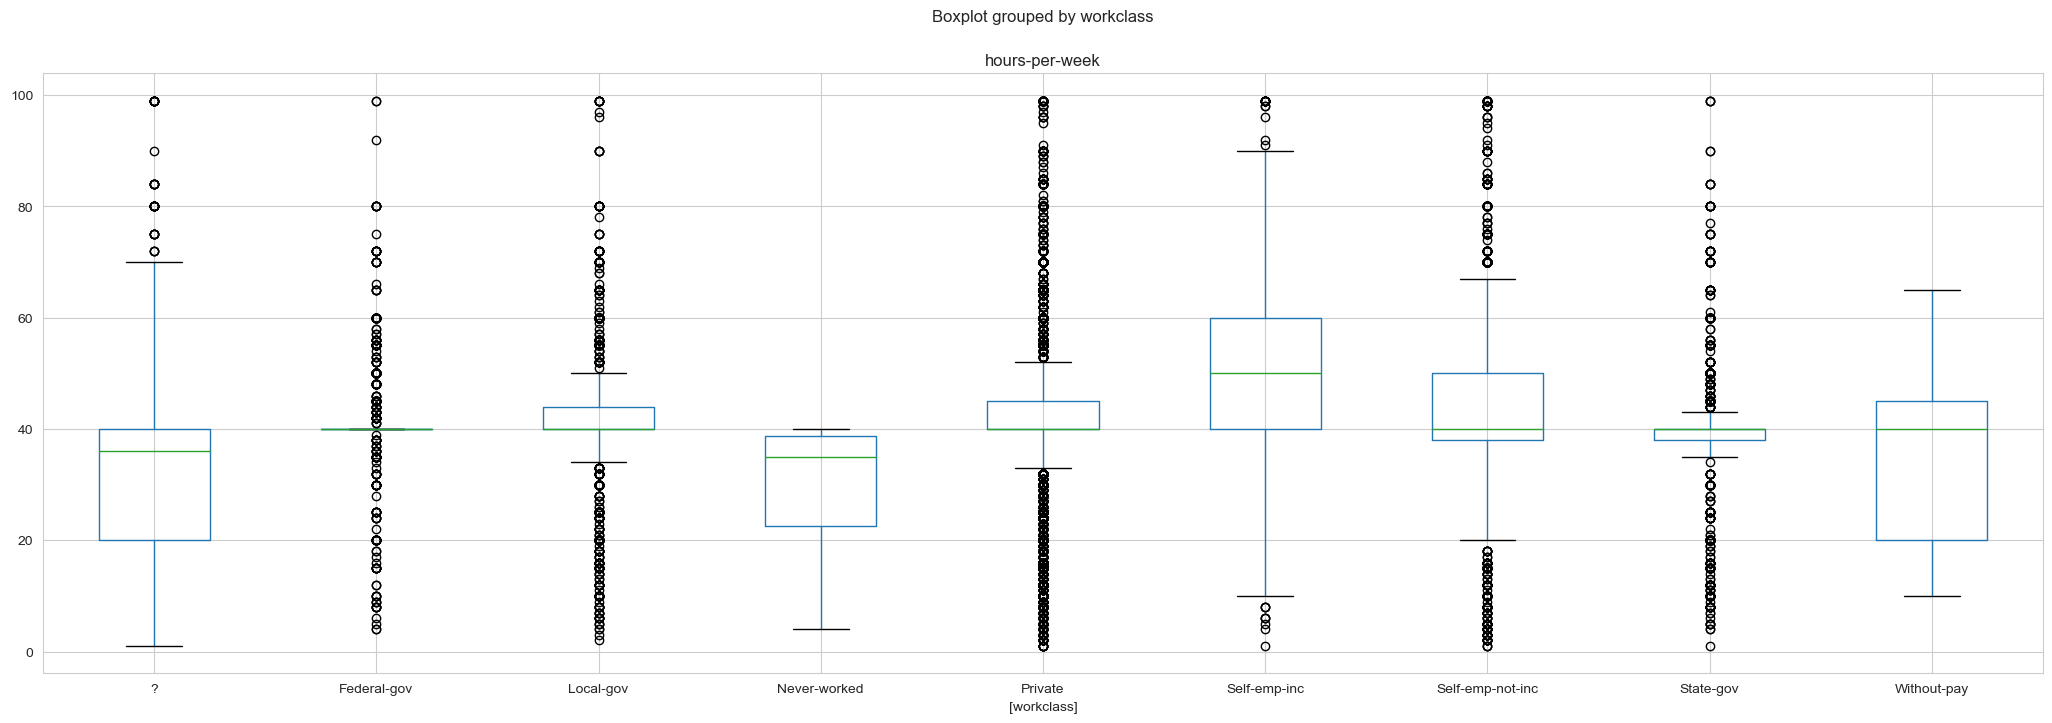

In [42]:
df[['workclass', 'hours-per-week']].boxplot(by='workclass', figsize=(25, 8))

## Skewness and kurtosis

### Without plotting the histograms, is the population's age skewed to the left or to the right? What if it is restricted to low or high income? Present yout conclusions.

In [43]:
pop_skew = df['age'].skew()
high_income_skew = df.loc[mask_high_income, 'age'].skew()
low_income_skew = df.loc[~mask_high_income, 'age'].skew()

print(f'The median age of the population is {df["age"].median()}, the mean age is {df["age"].mean()} and the skew is {pop_skew}')
print(f'The median age of the high income population is {df.loc[mask_high_income, "age"].median()}, the mean is {df.loc[mask_high_income, "age"].mean()} and the skew is {high_income_skew}')
print(f'The median age of the low income population is {df.loc[~mask_high_income, "age"].median()}, the mean age is {df.loc[~mask_high_income, "age"].mean()} and the skew is {low_income_skew}')

The median age of the population is 37.0, the mean age is 38.64358543876172 and the skew is 0.5575803166133181
The median age of the high income population is 43.0, the mean is 44.275177547702576 and the skew is 0.498595669813743
The median age of the low income population is 34.0, the mean age is 36.87218409366169 and the skew is 0.7551011465573891


### Plot the histogram of the age of the population, of the high income population and of the low income population to confirm the previous conclusions.

<Axes: title={'center': 'High income population (skew = 0.50)'}, ylabel='Frequency'>

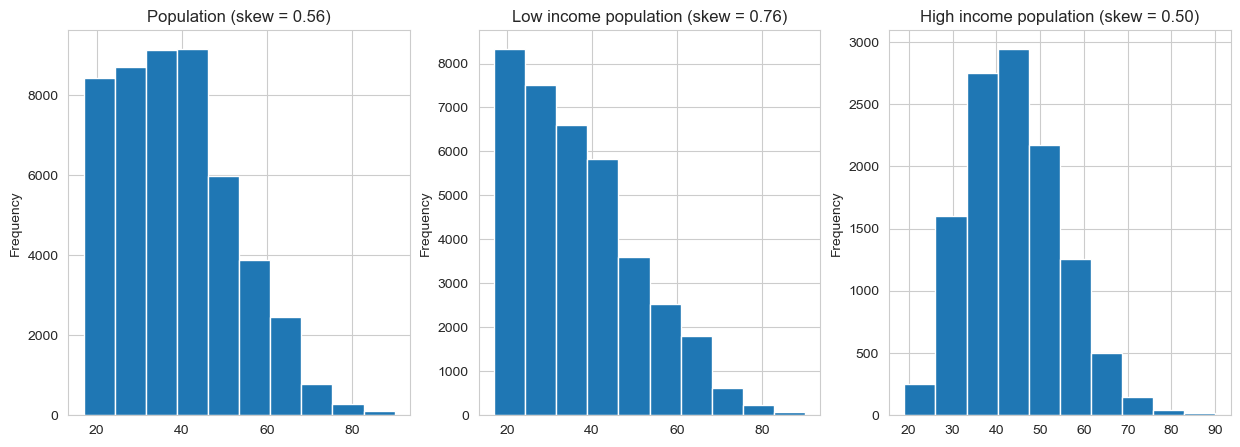

In [44]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
df['age'].plot.hist(ax=axes[0], title=f'Population (skew = {pop_skew:.2f})')
df.loc[~mask_high_income, "age"].plot.hist(ax=axes[1], title=f'Low income population (skew = {low_income_skew:.2f})')
df.loc[mask_high_income, "age"].plot.hist(ax=axes[2], title=f'High income population (skew = {high_income_skew:.2f})')

All have positive skew, so the population is skewed to the right in all cases. Also, being the median smaller than the mean, gives the clue that the distribution is right skewed.